Al ser el caso uno de tipo programado, este debe resolverse siguiendo una serie de pasos lógicos. Para esta unidad debes desarrollar la fase #2 cuyo objetivo es utilizar una herramienta de visualización para construir gráficas que permitan realizar un análisis más detallado de los datos preparados en la fase #1 de la unidad anterior. Estas gráficas conforman la respuesta a los ejercicios de interés de este segundo paso. Así mismo, con la resolución de este paso, se resuelve el caso en su totalidad.los ejercicios de interés son los siguientes:
1.	Construir una gráfica que muestre la variación de contagios, mes a mes, de los tres países con más casos reportados.
2.	Construir una gráfica que muestre una comparación del total de contagios de cinco países.
3.	Usando los países elegidos en el punto anterior, construir una gráfica que muestre el porcentaje de contagios de cada país con respecto al total de contagios en el mundo.


In [34]:
# Cargamos las librerias 
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
from random import sample

In [18]:
#Cargamos el dataset y miramos unos datos aleatoriamente
original_df = pd.read_csv('')
original_df.sample(5)

,Province/State,Country/Region,Lat,Long,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,10/29/2022,10/30/2022,10/31/2022,11/1/2022,11/2/2022,11/3/2022,11/4/2022,11/5/2022,11/6/2022,11/7/2022
176,NaN,Madagascar,-18.766947,46.869107,0,0,0,0,0,0,...,66706,66749,66749,66749,66749,66749,66749,66749,66788,66788
10,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,3549295,3549295,3549295,3549295,3549295,3561735,3561735,3561735,3561735,3561735
151,NaN,Iraq,33.223191,43.679291,0,0,0,0,0,0,...,2461247,2461247,2461484,2461484,2461484,2461484,2461484,2461484,2461484,2461857
185,NaN,Mexico,23.634500,-102.552800,0,0,0,0,0,0,...,7108686,7111104,7110993,7110993,7112504,7112504,7113658,7113658,7113658,7113429
214,NaN,Paraguay,-23.442500,-58.443800,0,0,0,0,0,0,...,717955,717955,717955,717955,717955,717955,717980,717980,717980,717980


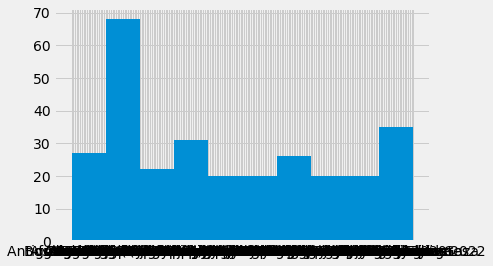

In [19]:
plt.hist(original_df['Country/Region'])
plt.show()

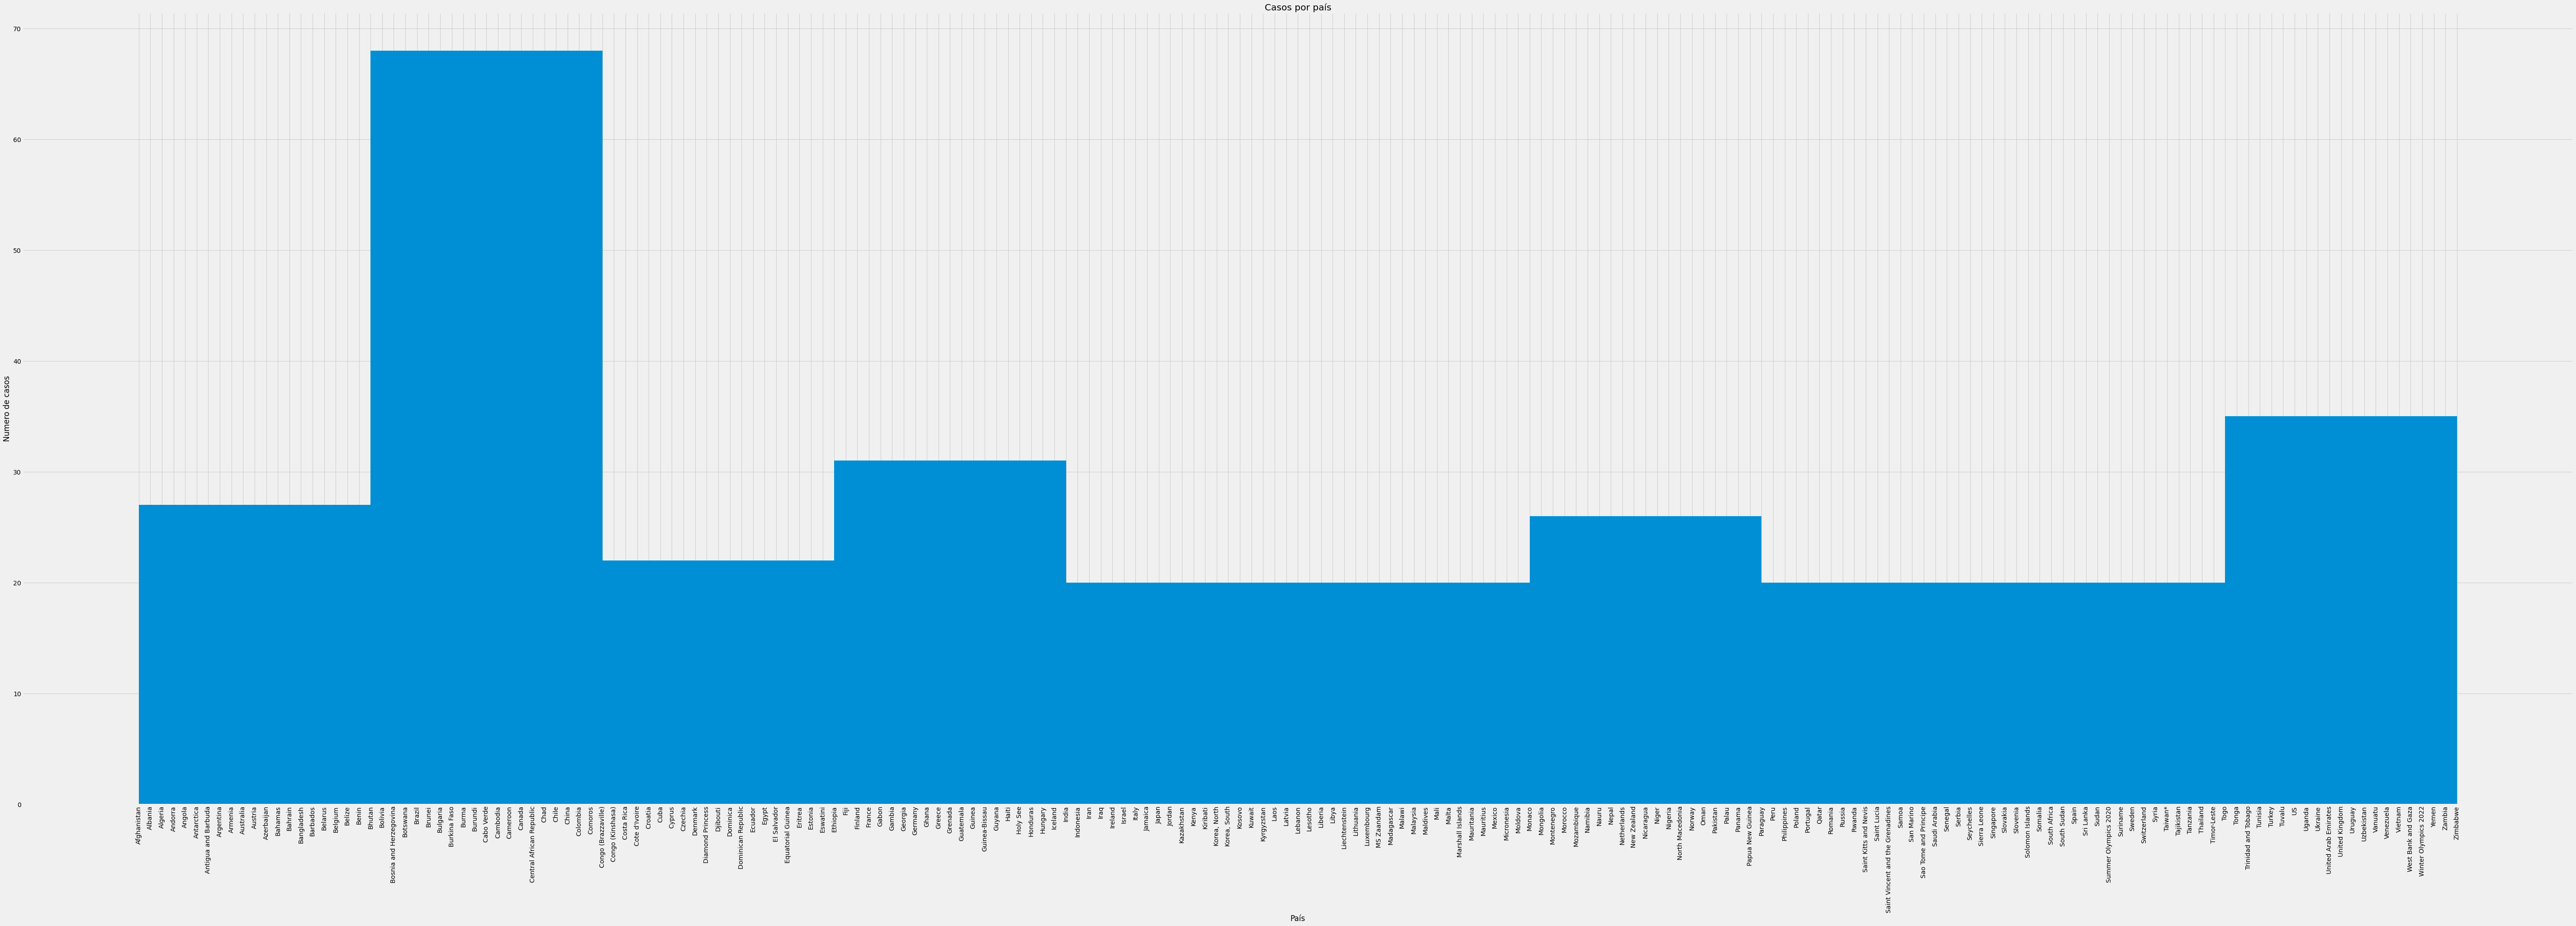

In [20]:
#Se realizan ajustes a la grafica
plt.style.use('fivethirtyeight')
plt.figure(figsize=(90,30))

pais=original_df['Country/Region']

plt.hist(pais)

plt.title('Casos por país')

plt.xlabel('País')
plt.ylabel('Numero de casos')

plt.xticks(rotation='vertical')

plt.show()

In [21]:
df_date = original_df.iloc[:,4:]
date_list = list(df_date.columns.values)
date_list

['1/22/2020',
 '1/23/2020',
 '1/24/2020',
 '1/25/2020',
 '1/26/2020',
 '1/27/2020',
 '1/28/2020',
 '1/29/2020',
 '1/30/2020',
 '1/31/2020',
 '2/1/2020',
 '2/2/2020',
 '2/3/2020',
 '2/4/2020',
 '2/5/2020',
 '2/6/2020',
 '2/7/2020',
 '2/8/2020',
 '2/9/2020',
 '2/10/2020',
 '2/11/2020',
 '2/12/2020',
 '2/13/2020',
 '2/14/2020',
 '2/15/2020',
 '2/16/2020',
 '2/17/2020',
 '2/18/2020',
 '2/19/2020',
 '2/20/2020',
 '2/21/2020',
 '2/22/2020',
 '2/23/2020',
 '2/24/2020',
 '2/25/2020',
 '2/26/2020',
 '2/27/2020',
 '2/28/2020',
 '2/29/2020',
 '3/1/2020',
 '3/2/2020',
 '3/3/2020',
 '3/4/2020',
 '3/5/2020',
 '3/6/2020',
 '3/7/2020',
 '3/8/2020',
 '3/9/2020',
 '3/10/2020',
 '3/11/2020',
 '3/12/2020',
 '3/13/2020',
 '3/14/2020',
 '3/15/2020',
 '3/16/2020',
 '3/17/2020',
 '3/18/2020',
 '3/19/2020',
 '3/20/2020',
 '3/21/2020',
 '3/22/2020',
 '3/23/2020',
 '3/24/2020',
 '3/25/2020',
 '3/26/2020',
 '3/27/2020',
 '3/28/2020',
 '3/29/2020',
 '3/30/2020',
 '3/31/2020',
 '4/1/2020',
 '4/2/2020',
 '4/3/2020',

In [22]:
df_unpivot = pd.melt(original_df, id_vars='Country/Region', value_vars=date_list, var_name='Date', value_name='amount')
df_unpivot["Date"] = pd.to_datetime(df_unpivot["Date"])
df_unpivot.rename(columns={'amount': 'DailyCumReport'}, inplace=True)
df_unpivot["Year"]= df_unpivot["Date"].dt.year
df_unpivot["Month"]= df_unpivot["Date"].dt.month
df_unpivot["Year-Month"]=pd.to_datetime(df_unpivot.Date).dt.strftime('%Y-%m')
df_unpivot = df_unpivot[['Country/Region','Date','DailyCumReport','Year-Month']]
df_unpivot

,Country/Region,Date,DailyCumReport,Year-Month
0,Afghanistan,2020-01-22,0,2020-01
1,Albania,2020-01-22,0,2020-01
2,Algeria,2020-01-22,0,2020-01
3,Andorra,2020-01-22,0,2020-01
4,Angola,2020-01-22,0,2020-01
...,...,...,...,...
295064,West Bank and Gaza,2022-11-07,703036,2022-11
295065,Winter Olympics 2022,2022-11-07,535,2022-11
295066,Yemen,2022-11-07,11945,2022-11
295067,Zambia,2022-11-07,333685,2022-11


In [23]:
df_dailydata_DateSort  = df_unpivot.sort_values('Date',ascending=True) #Ordenar mayor a menor
df_dailydata_DateSort

,Country/Region,Date,DailyCumReport,Year-Month
0,Afghanistan,2020-01-22,0,2020-01
196,Netherlands,2020-01-22,0,2020-01
195,Nepal,2020-01-22,0,2020-01
194,Nauru,2020-01-22,0,2020-01
193,Namibia,2020-01-22,0,2020-01
...,...,...,...,...
294873,Colombia,2022-11-07,6310332,2022-11
294872,China,2022-11-07,3578,2022-11
294871,China,2022-11-07,2732,2022-11
294850,China,2022-11-07,3811,2022-11


In [24]:
df_dailydata_DateSort = df_dailydata_DateSort.groupby('Date').sum()
df_dailydata_DateSort.reset_index(inplace=True)
df_dailydata_DateSort

,Date,DailyCumReport
0,2020-01-22,557
1,2020-01-23,657
2,2020-01-24,944
3,2020-01-25,1437
4,2020-01-26,2120
...,...,...
1016,2022-11-03,631804956
1017,2022-11-04,632230206
1018,2022-11-05,632430140
1019,2022-11-06,632616104


In [25]:
df_dailydata_DateSort['daily_diff'] = df_dailydata_DateSort['DailyCumReport'].diff()
df_dailydata_DateSort

,Date,DailyCumReport,daily_diff
0,2020-01-22,557,NaN
1,2020-01-23,657,100.0
2,2020-01-24,944,287.0
3,2020-01-25,1437,493.0
4,2020-01-26,2120,683.0
...,...,...,...
1016,2022-11-03,631804956,469933.0
1017,2022-11-04,632230206,425250.0
1018,2022-11-05,632430140,199934.0
1019,2022-11-06,632616104,185964.0


In [26]:
df_dailydata_DateSort["Year"]= df_dailydata_DateSort["Date"].dt.year
df_dailydata_DateSort["Month"]= df_dailydata_DateSort["Date"].dt.month
df_dailydata_DateSort["Year-Month"]=pd.to_datetime(df_dailydata_DateSort.Date).dt.strftime('%Y-%m')
df_dailydata_DateSort_2 = df_dailydata_DateSort[['Year-Month','daily_diff']]
df_dailydata_DateSort_2

,Year-Month,daily_diff
0,2020-01,NaN
1,2020-01,100.0
2,2020-01,287.0
3,2020-01,493.0
4,2020-01,683.0
...,...,...
1016,2022-11,469933.0
1017,2022-11,425250.0
1018,2022-11,199934.0
1019,2022-11,185964.0


In [27]:
df_dailydata_DateSort_2 = df_dailydata_DateSort_2.groupby('Year-Month').sum()
df_dailydata_DateSort_2 = df_dailydata_DateSort_2.sort_values('daily_diff',ascending=False) #Ordenar mayor a menor
df_dailydata_DateSort_2.rename(columns={'daily_diff':'total_month'}, inplace=True)
df_dailydata_DateSort_2.head()

,total_month
Year-Month,
2022-01,90357508.0
2022-02,58155529.0
2022-03,51556550.0
2022-07,29586479.0
2022-08,25666839.0


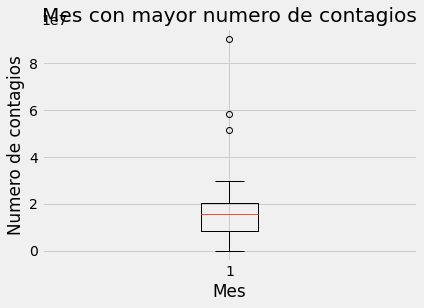

In [28]:
mes_contagios=df_dailydata_DateSort_2['total_month']

plt.boxplot(mes_contagios)

plt.title('Mes con mayor numero de contagios')

plt.xlabel('Mes')
plt.ylabel('Numero de contagios')

plt.show()


In [20]:
#Grafico de barras especificando la columna cualitativa y la cuantitativa 


plt.bar(df_dailydata_DateSort_2['Year-Month'], df_dailydata_DateSort_2['total_month'], color='#FF8A65')

#plt.bar(original_df['Country/Region'], original_df['1/26/2020'], color='#FF8A65')

plt.title('Total detecciones')

plt.xlabel('Mes')
plt.ylabel('Numero de casos')

plt.xticks(rotation=90)

plt.show()

KeyError: 'Year-Month'

In [29]:
df_dailydata_CDSort  = df_unpivot.sort_values(['Country/Region','Date'],ascending=[True,True]) #Ordenar mayor a menor
df_dailydata_CDSort['daily_diff'] = df_dailydata_CDSort['DailyCumReport'].diff().fillna(0)
df_dailydata_CDSort


,Country/Region,Date,DailyCumReport,Year-Month,daily_diff
0,Afghanistan,2020-01-22,0,2020-01,0.0
289,Afghanistan,2020-01-23,0,2020-01,0.0
578,Afghanistan,2020-01-24,0,2020-01,0.0
867,Afghanistan,2020-01-25,0,2020-01,0.0
1156,Afghanistan,2020-01-26,0,2020-01,0.0
...,...,...,...,...,...
293912,Zimbabwe,2022-11-03,257893,2022-11,0.0
294201,Zimbabwe,2022-11-04,257893,2022-11,0.0
294490,Zimbabwe,2022-11-05,257893,2022-11,0.0
294779,Zimbabwe,2022-11-06,257893,2022-11,0.0


In [30]:
filter_month = df_dailydata_CDSort['Year-Month']=='2022-01'
df_dailydata_CDSort_Filter = df_dailydata_CDSort[filter_month]
df_dailydata_CDSort_Filter = df_dailydata_CDSort_Filter[['Country/Region','daily_diff']]
df_dailydata_CDSort_Filter

,Country/Region,daily_diff
205190,Afghanistan,23.0
205479,Afghanistan,82.0
205768,Afghanistan,-6.0
206057,Afghanistan,22.0
206346,Afghanistan,40.0
...,...,...
212992,Zimbabwe,153.0
213281,Zimbabwe,237.0
213570,Zimbabwe,82.0
213859,Zimbabwe,45.0


In [32]:
df_dailydata_CDSort_F_Sum = df_dailydata_CDSort_Filter.groupby(['Country/Region']).sum()
df_dailydata_CDSort_F_Sum = df_dailydata_CDSort_F_Sum.sort_values('daily_diff',ascending=False) #Ordenar mayor a menor
df_dailydata_CDSort_F_Sum.rename(columns={'daily_diff':'total_month'}, inplace=True)
df_dailydata_CDSort_F_Sum.head()



,total_month
Country/Region,
US,20354054.0
France,8951273.0
India,6607920.0
Italy,4857433.0
United Kingdom,4378007.0


1.	Construir una gráfica que muestre la variación de contagios, mes a mes, de los tres países con más casos reportados.

C:\Users\castr\AppData\Local\Temp/ipykernel_6884/513757787.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels( labels =df_paises_3['Year-Month'] ,rotation=90)


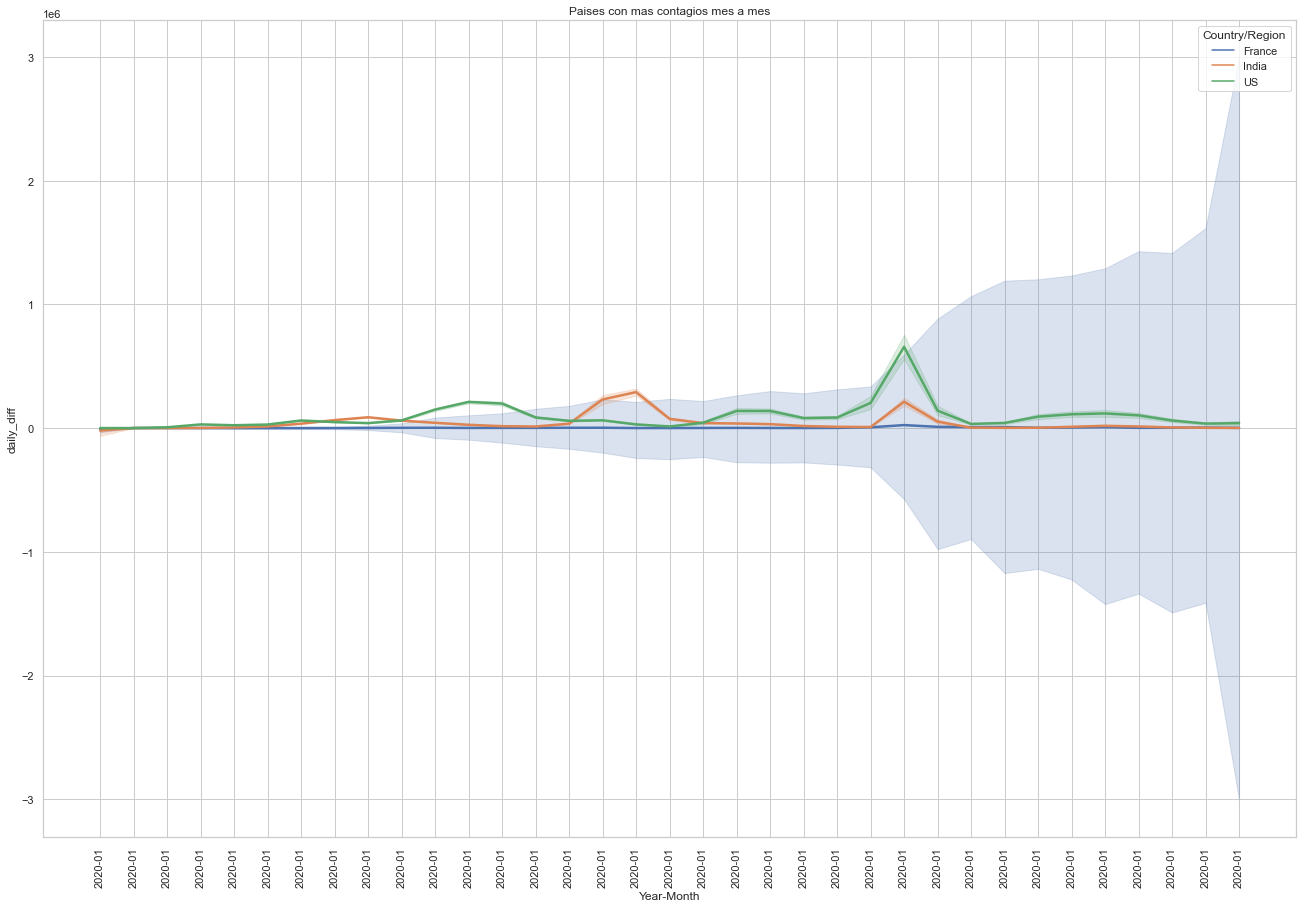

In [40]:
#Se plantea un grafico de lineas para comparar los tres paises con mas reportes

sns.set(rc={'figure.figsize':(20,14)}, style="whitegrid")
df_paises=df_dailydata_CDSort['Country/Region']
df_paises_2=(df_paises=='US') | (df_paises=='France') | (df_paises=='India')
df_paises_3=df_dailydata_CDSort.loc[df_paises_2,['Country/Region','daily_diff','Year-Month']]
g=sns.lineplot(data=df_paises_3 ,x='Year-Month', y= 'daily_diff', hue='Country/Region', color='red', linewidth=2.5) 
g.set_xticklabels( labels =df_paises_3['Year-Month'] ,rotation=90)
g.set(title='Paises con mas contagios mes a mes')
plt.show()

2.	Construir una gráfica que muestre una comparación del total de contagios de cinco países.

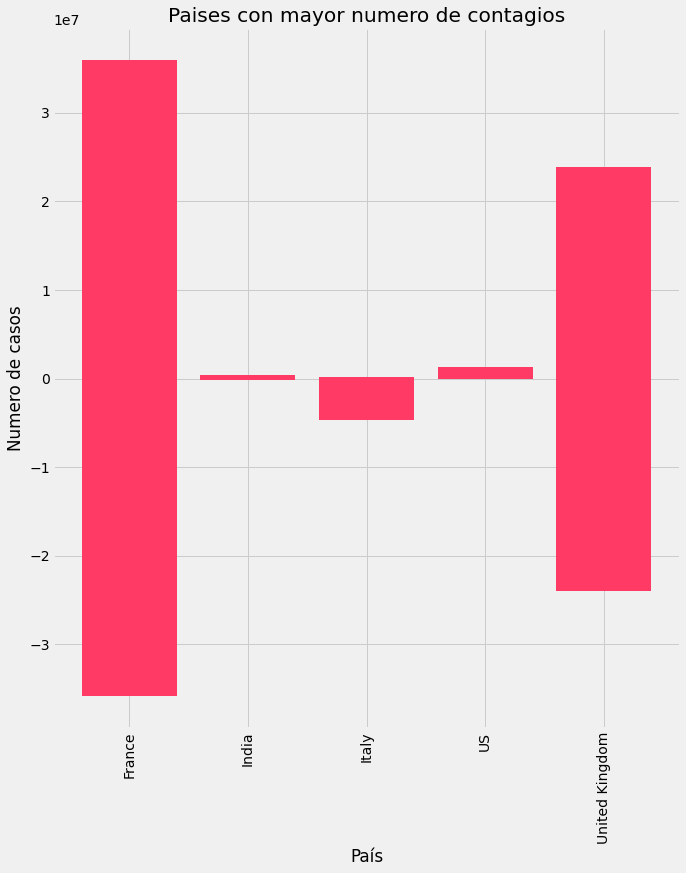

In [25]:
#Grafico de barras especificando la columna cualitativa y la cuantitativa 

plt.figure(figsize=(10,12))

df_paises=df_dailydata_CDSort['Country/Region']
df_paises_2=(df_paises=='US') | (df_paises=='France') | (df_paises=='India') | (df_paises=='Italy') | (df_paises=='United Kingdom')
df_paises_3=df_dailydata_CDSort.loc[df_paises_2,['Country/Region','daily_diff']]

plt.bar(df_paises_3['Country/Region'], df_paises_3['daily_diff'], color='#FF3A65')



plt.title('Paises con mayor numero de contagios')

plt.xlabel('País')
plt.ylabel('Numero de casos')

plt.xticks(rotation=90)

plt.show()

3.	Usando los países elegidos en el punto anterior, construir una gráfica que muestre el porcentaje de contagios de cada país con respecto al total de contagios en el mundo.